In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#from sklearn.preprpsessing

## 初手

In [5]:
stock_df = pd.read_csv('./input_data/S&P500_Stock_Data.csv')
stock_df.head()

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [6]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [11]:
stock_df.isna().any()

Interest Rates    False
Employment        False
S&P 500 Price     False
dtype: bool

In [15]:
stock_df.shape

(1000, 3)

In [17]:
stock_df.drop_duplicates(inplace=True)
stock_df.shape

(1000, 3)

In [16]:
stock_df.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764328
max,3.000000,70.000000,3000.000000


### DataViz

<Figure size 800x400 with 0 Axes>

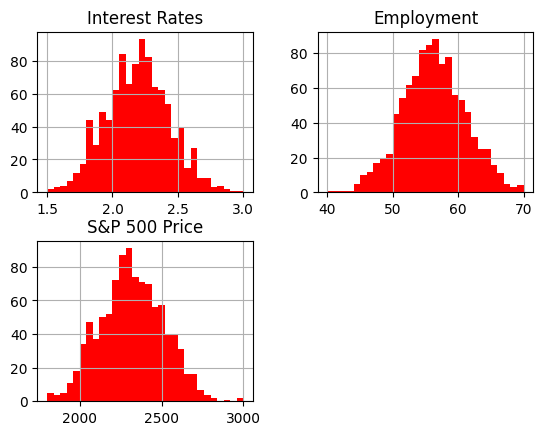

In [22]:
# ヒストグラム
plt.figure(figsize=(8, 4))
stock_df.hist(bins=30, color='r');

<Axes: >

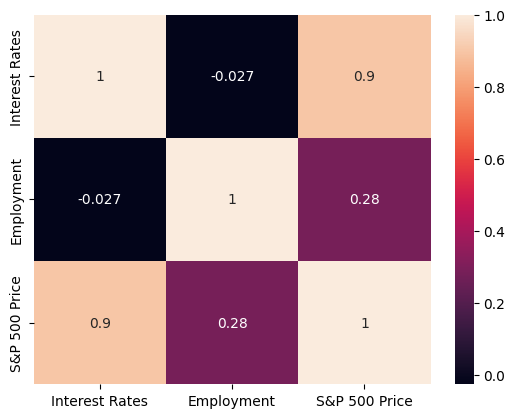

In [30]:
# 相関
corr_metrics = stock_df.corr()
sns.heatmap(corr_metrics, annot=True)

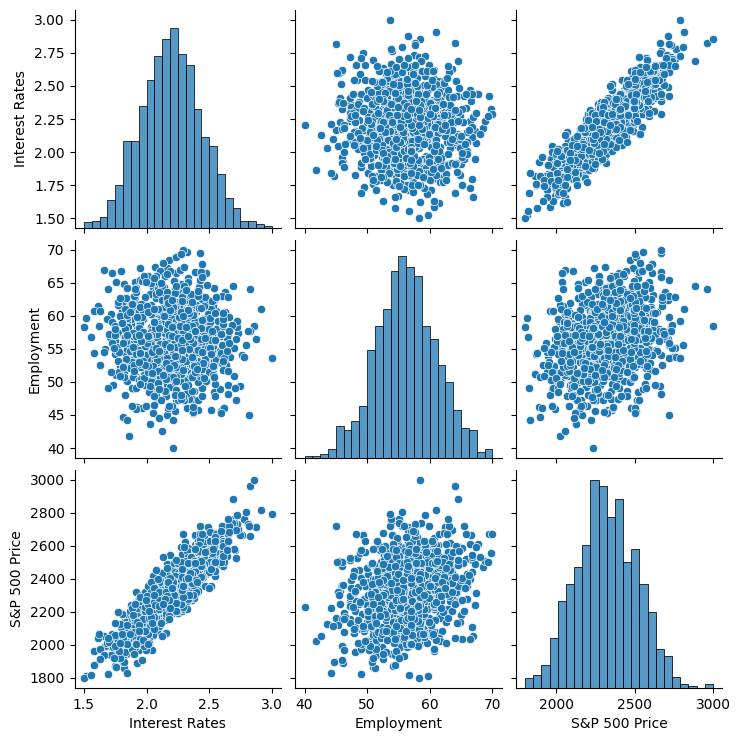

In [28]:
# ヒストグラム＆散布図　　"""特徴量が少ない場合の使用を奨励"""
sns.pairplot(stock_df);

- データの欠損や大きな外れ値はなさそう
- 目的変数である「S&P 500 Price」と相関関係がありそうな、説明変数は「Interest Rates」である

## 予測

In [56]:
X = stock_df.drop('S&P 500 Price', axis=1)
y = stock_df['S&P 500 Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [57]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [58]:
# 決定係数
reg.score(X_train,y_train)

0.9025616211960653

In [59]:
# 予測
y_pred=reg.predict(X_test)

Text(0.5, 0, 'Predict S&P 500 Price')

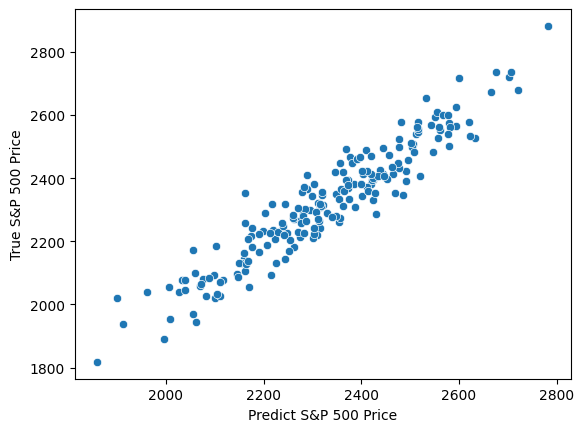

In [70]:
# 実値と予測値との差を散布図で表示
sns.scatterplot(y=y_test, x=y_pred)
plt.ylabel("True S&P 500 Price")
plt.xlabel("Predict S&P 500 Price")

## 評価

In [88]:
k = X_test.shape[1]
n = len(X_test)

RMSE=np.sqrt(mean_squared_error(y_test, y_pred))
MSE=mean_squared_error(y_test, y_pred)
MAE=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
adj_r2=1-(1-r2)*(n-1)/(n-k-1)

print("RMSE = {0}\nMSE = {1}\nMAE = {2}\nR2 = {3}\nADJUST R2 = {4}".format(RMSE, MSE, MAE, r2, adj_r2))

RMSE = 59.2756663173311
MSE = 3513.6046173635805
MAE = 47.226784702743856
R2 = 0.8958792642873611
ADJUST R2 = 0.8948222009806338


- MAE(平均絶対誤差)は、回帰モデルが発生させる誤差の平均的な大きさを示す指標です
- MSE(平均二乗誤差)は平均絶対誤差（MAE）とよく似ていますが、絶対値を使うのではなく、モデルの予測値とトレーニングデータセット（真値）の差の二乗が計算されます。MSEの値は、残差の二乗が計算されるため、一般にMAEに比べて大きくなります。データの異常値がある場合、MSEはMAEと比較して非常に大きくなります。
- RMSE（Root Mean Square Error）は、残差（すなわち、モデルの予測値と真値（学習データ）の差）の標準偏差を表します。RMSEの単位は出力の単位と一致するため、MSEと比較して容易に解釈することができる。 
- 決定係数は1に近づくにつれて、予測精度が高いと言える。(回帰分析によって求められた目的変数の予測値が、実際の目的変数の値とどのくらい一致しているかを表す指標)